# Import Libraries

In [1]:
#import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.model_selection import KFold

import os

# Download dataset from Kaggle

In [2]:
#set kaggle API credentials
import os
os.environ['KAGGLE_USERNAME'] = "nahiyan1402"
os.environ['KAGGLE_KEY'] = "a7a0004c68eee90da4ee85ae5225b20c"


In [3]:
#download dataset
! kaggle datasets download -d uciml/breast-cancer-wisconsin-data

  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 32.8MB/s]


In [4]:
#unzip file
! unzip /content/breast-cancer-wisconsin-data.zip

Archive:  /content/breast-cancer-wisconsin-data.zip
  inflating: data.csv                


# Load & Explore Data

In [5]:
#load data on dataframe
df = pd.read_csv('/content/data.csv')

In [6]:
#display dataframe
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
#count of rows and columns
df.shape

(569, 33)

In [8]:
#count number of null(empty) values
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
# Drop the column with null values
df.dropna(axis = 1, inplace = True) #axis = 1 form dropping column, 0 for dropping rows, and inplace True will update the actual dataset

In [10]:
# count of rows and columns
df.shape

(569, 32)

In [11]:
#Get count of number of M or B cells in diagnosis
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# Label Encoding

In [12]:
#Get Datatypes of each column in our dataset
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [13]:
#Encode the diagnosis values
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df.iloc[:,1] = labelencoder.fit_transform(df.iloc[:,1].values)

In [14]:
#display df
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Split Dataset & Feature Scaling

In [15]:
#Splitting the dataset into independent and dependent datasets 
X = df.iloc[:,2:]
Y = df.iloc[:,1]

In [16]:
#Splitting datasets into training(75%) and testing(25%)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25)

In [17]:
#Scaling the data(feature scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [18]:
#print data
X_train

array([[-0.63414152, -0.1875379 , -0.60504892, ..., -0.02326756,
         0.83041308, -0.03490704],
       [-0.66060029, -0.44434685, -0.69334853, ..., -0.96375535,
        -0.19904169, -0.1734423 ],
       [ 1.25325041,  0.33786024,  1.25867289, ...,  0.55751174,
         0.29236472, -0.31992631],
       ...,
       [-0.10496621, -0.72471626, -0.15412083, ..., -0.70911797,
         0.70714503, -0.41190464],
       [-0.08732704,  1.08943873, -0.12411611, ..., -0.84666275,
        -0.39227268, -1.19542375],
       [-0.92518794, -1.4574464 , -0.97496427, ..., -1.18279658,
        -0.26733885, -0.42098892]])

# Build a Logistic Regression Model

In [19]:
#build a logistic regression classifier
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, Y_train)
#make use of trained model to make predictions on test data
lr_predictions = lr_classifier.predict(X_test)
#get accuracy score for model
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, lr_predictions))

0.9370629370629371


[[87  0]
 [ 9 47]]


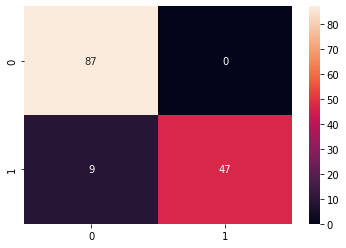

In [20]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(Y_test, lr_predictions)
print(lr_cm)
sns.heatmap(lr_cm, annot=True)


# **Build a Support Vector Machine Model**

In [21]:
from sklearn import svm # for Support Vector Machine

model = svm.SVC()
model.fit(X_train, Y_train)
svm_predictions = model.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, svm_predictions))


0.958041958041958


[[87  0]
 [ 6 50]]


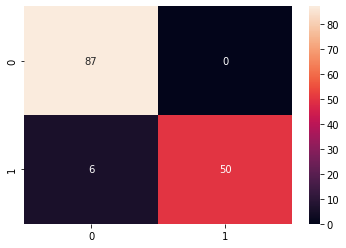

In [22]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
svm_cm = confusion_matrix(Y_test, svm_predictions)
print(svm_cm)
sns.heatmap(svm_cm, annot=True)

# KNN

In [29]:
#Finding best possible number of neighbors
no_of_neighbors_and_accuracies = {}
for i in range(1,23):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,Y_train)
    Y_knn = knn.predict(X_test)
    score = accuracy_score(Y_knn,Y_test)
    no_of_neighbors_and_accuracies[i] = score

In [30]:
no_of_neighbors_and_accuracies

{1: 0.9300699300699301,
 2: 0.9090909090909091,
 3: 0.9370629370629371,
 4: 0.916083916083916,
 5: 0.9370629370629371,
 6: 0.9230769230769231,
 7: 0.9370629370629371,
 8: 0.9370629370629371,
 9: 0.9370629370629371,
 10: 0.9300699300699301,
 11: 0.9300699300699301,
 12: 0.9300699300699301,
 13: 0.9300699300699301,
 14: 0.9300699300699301,
 15: 0.9300699300699301,
 16: 0.9230769230769231,
 17: 0.9300699300699301,
 18: 0.9300699300699301,
 19: 0.9370629370629371,
 20: 0.9300699300699301,
 21: 0.9440559440559441,
 22: 0.9440559440559441}

In [33]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
knn_predictions = model.predict(X_test)

In [34]:
print(accuracy_score(Y_test, svm_predictions))

0.958041958041958


[[87  0]
 [ 6 50]]


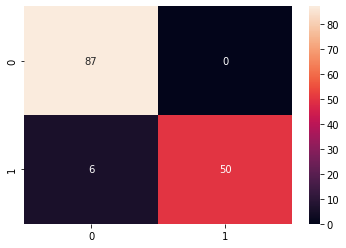

In [35]:
#plot confusion matrix

knn_cm = confusion_matrix(Y_test, knn_predictions)
print(knn_cm)
sns.heatmap(knn_cm, annot=True)

# Decision Tree

In [36]:
dtc = DecisionTreeClassifier(criterion='gini')
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [38]:
dtc_predictions = dtc.predict(X_test)
print(accuracy_score(Y_test, dtc_predictions))

0.9300699300699301


[[87  0]
 [ 6 50]]


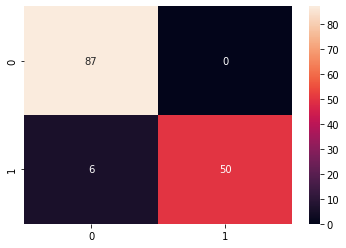

In [40]:
print(knn_cm)
dtc_cm = confusion_matrix(Y_test, knn_predictions)
sns.heatmap(dtc_cm, annot=True)

# Random_Forest

In [42]:
rfc = RandomForestClassifier(criterion='entropy')
rfc.fit(X_train, Y_train)
rfc_predictions = rfc.predict(X_test)

0.951048951048951
[[86  1]
 [ 6 50]]


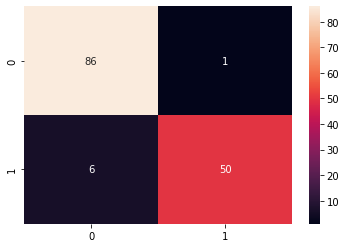

In [45]:

print(accuracy_score(Y_test, rfc_predictions))
rfc_cm = confusion_matrix(Y_test, rfc_predictions)
print(rfc_cm)

sns.heatmap(rfc_cm, annot=True)

# Naive Bayes

0.9440559440559441
[[87  0]
 [ 8 48]]


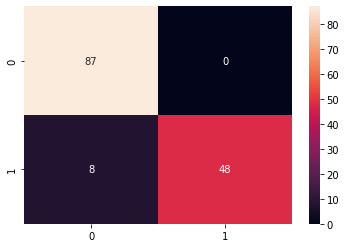

In [48]:
gnb = GaussianNB() 
gnb.fit(X_train, Y_train)
gnb_predictions = gnb.predict(X_test)

print(accuracy_score(Y_test, gnb_predictions))
gnb_cm = confusion_matrix(Y_test, gnb_predictions)
print(gnb_cm)

sns.heatmap(gnb_cm, annot=True)

## Gradient Boosting

0.9370629370629371
[[84  3]
 [ 6 50]]


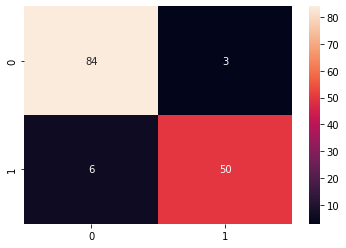

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, Y_train)
gbc_predictions = gbc.predict(X_test)

print(accuracy_score(Y_test, gbc_predictions))
gbc_cm = confusion_matrix(Y_test, gbc_predictions)
print(gbc_cm)

sns.heatmap(gbc_cm, annot=True)

## Stochastic Gradient Decent

0.9440559440559441
[[86  1]
 [ 7 49]]


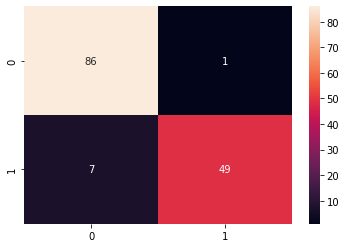

In [53]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier()

sgdc.fit(X_train, Y_train)
sgdc_predictions = sgdc.predict(X_test)

print(accuracy_score(Y_test, sgdc_predictions))
sgdc_cm = confusion_matrix(Y_test, sgdc_predictions)
print(sgdc_cm)

sns.heatmap(sgdc_cm, annot=True)

## AdaBoost

0.9300699300699301
[[85  2]
 [ 8 48]]


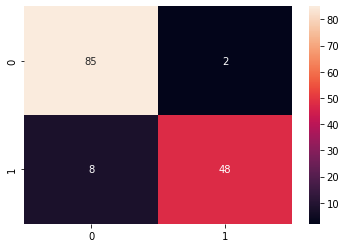

In [54]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()

adb.fit(X_train, Y_train)
adb_predictions = adb.predict(X_test)

print(accuracy_score(Y_test, adb_predictions))
adb_cm = confusion_matrix(Y_test, adb_predictions)
print(adb_cm)

sns.heatmap(adb_cm, annot=True)

0.9440559440559441
[[85  2]
 [ 6 50]]


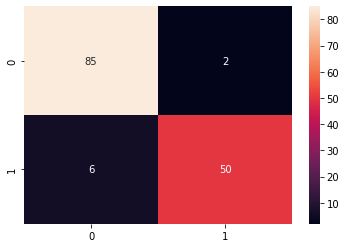

In [55]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(X_train,Y_train)
xgb_predictions = xgb.predict(X_test)


print(accuracy_score(Y_test, xgb_predictions))
xgb_cm = confusion_matrix(Y_test, xgb_predictions)
print(xgb_cm)

sns.heatmap(xgb_cm, annot=True)